## 目的　
#### yを予測したい

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random
df=pd.read_csv('train_data.csv')

In [2]:
df
#datetime	日時（YYYY-MM-DD）	文字列
#1	y	引越し数	数値：整数
#2	client	法人が絡む特殊な引越し日フラグ	数値：整数（0,1）
#3	close	休業日	数値：整数（0,1）
#4	price_am	午前の料金区分（-1は欠損を表す。5が最も料金が高い）	数値：整数（-1,0,1,2,3,4,5）
#5	price_pm	午後の料金区分（-1は欠損を表す。5が最も料金が高い）	数値：整数（-1,0,1,2,3,4,5）

,datetime,y,client,close,price_am,price_pm,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2010-07-01,17,0,0,0,0,0,0,0,0,1,0,0
1,2010-07-02,18,0,0,0,0,1,0,0,0,0,0,0
2,2010-07-03,20,0,0,0,0,0,0,1,0,0,0,0
3,2010-07-04,20,0,0,0,0,0,0,0,1,0,0,0
4,2010-07-05,14,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2016-03-27,94,1,0,5,4,0,0,0,1,0,0,0
2097,2016-03-28,86,1,0,4,4,0,1,0,0,0,0,0
2098,2016-03-29,98,1,0,4,4,0,0,0,0,0,1,0
2099,2016-03-30,99,1,0,5,4,0,0,0,0,0,0,1


## データの可視化

<AxesSubplot:>

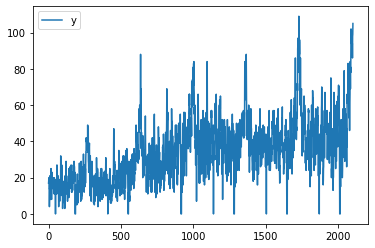

In [124]:
df[['datetime','y']].plot()

In [3]:
df.columns

Index(['datetime', 'y', 'client', 'close', 'price_am', 'price_pm', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

/Users/jaguar2801/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


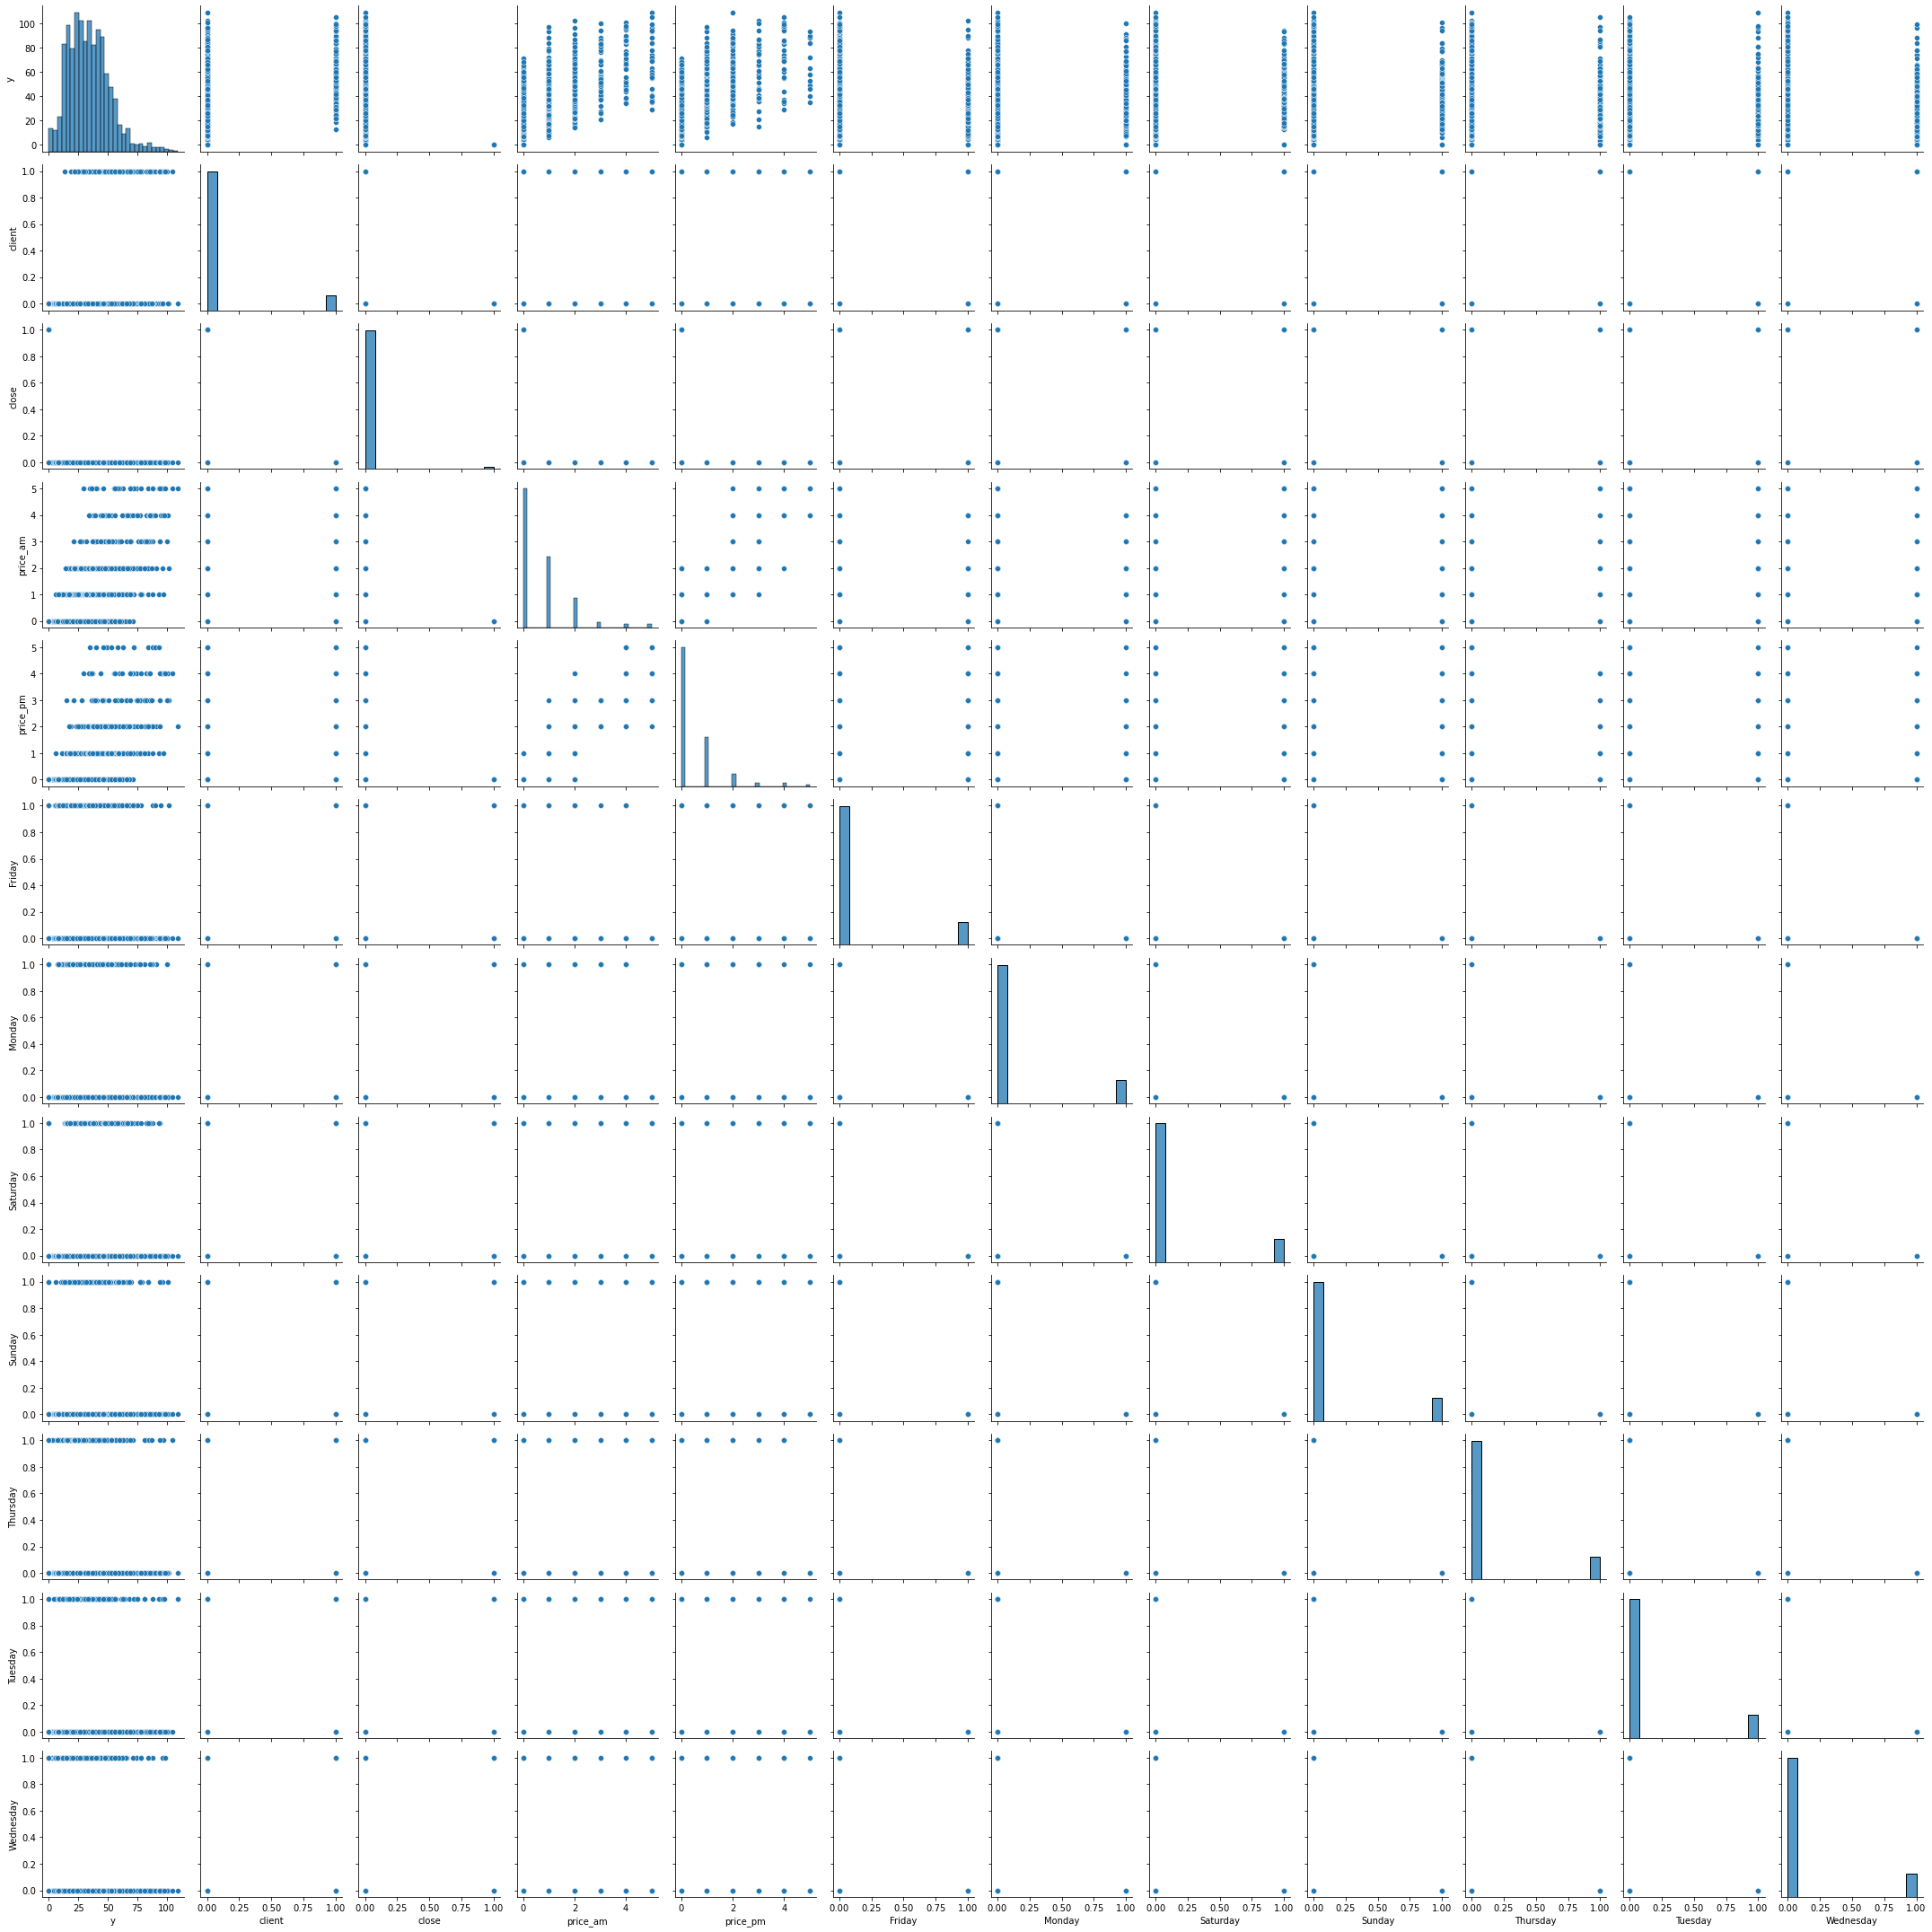

In [4]:
import seaborn as sns
col= ['y', 'client', 'close', 'price_am', 'price_pm', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
sns.pairplot(df[col],size=2.5)
plt.tight_layout()
plt.show()

回帰予測になる。情報が少ないのでニューラルネットは組めない。機械学習、統計的手法で対策を打ちたい。それぞれの分散、決定係数を知りたい。


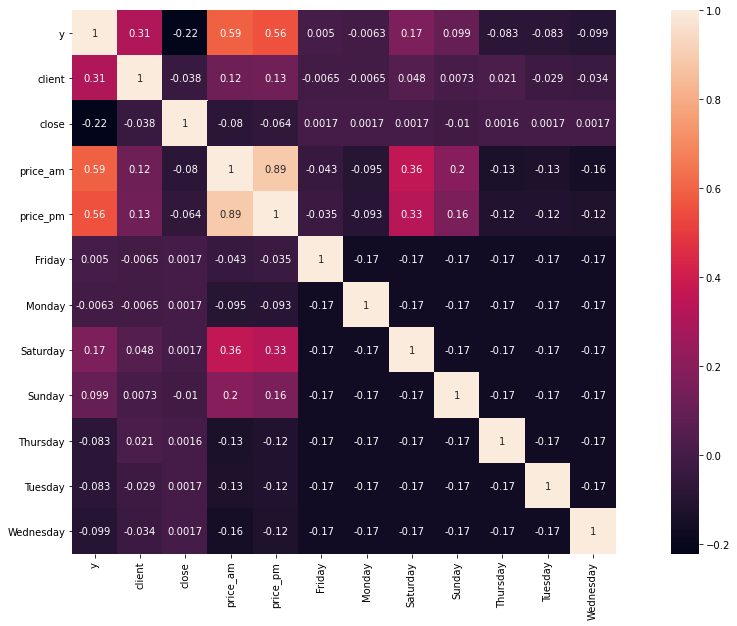

In [6]:
import numpy as np
plt.figure(figsize=(20, 10))
cm = np.corrcoef(df[col].values.T)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,yticklabels=col,xticklabels=col)

## 試しに線形回帰

In [144]:
import sklearn
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [145]:
x=df.drop(['y','datetime'],axis=1)
y=df['y']

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
scaler=StandardScaler()
a=scaler.fit(x_train)
x_data=a.transform(x_train)
model = LinearRegression()
r=model.fit(x_data, y_train)
y_pred=model.predict(a.transform(x_test))
mse = mean_squared_error(y_test, y_pred)
print("KERAS REG RMSE : %.2f" % (mse ))

KERAS REG RMSE : 173.13


scalerをせずに予測させるとerror :170.36になる
scalerを適用させるとerror:171.07になる

値段設定をダミー変数にしてみる？

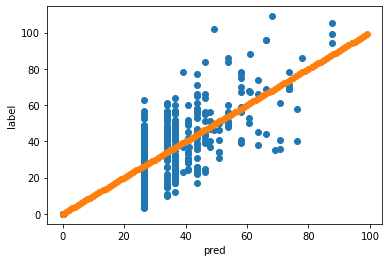

In [138]:
import matplotlib.pyplot as plt

plt.scatter(y_pred,y_test)
x_=[]
y_=[]
for i in range(100):
    x_.append(i)
    y_.append(i)
plt.xlabel('pred')
plt.ylabel('label')
plt.scatter(x_,y_)    

In [132]:
print(a)

StandardScaler()
